# Widget International
## Forecast of Quarterly Reveneue
## Eric Kofoid

In [2]:
library(fpp)

Loading required package: forecast
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 

Loading required package: fma
Loading required package: tseries
Loading required package: expsmooth
Loading required package: lmtest


In [3]:
# read in the csv file
ds <- read.csv("data.csv", sep=",", header=TRUE)

# use zoo to convert the date "YYYY-MM" to a date
zoo <- read.zoo(ds, sep=",", FUN=as.yearqtr)

# us ts to convert the zoo object to ts object using the correct intervals
ts = ts(zoo, frequency=4, start=c(1980,1), end=c(2015, 4))

In [4]:
rev = ts[,3]

## Check for T/S
There is definitely trend and seasonality. So this data needs to be transformed and maybe differenced

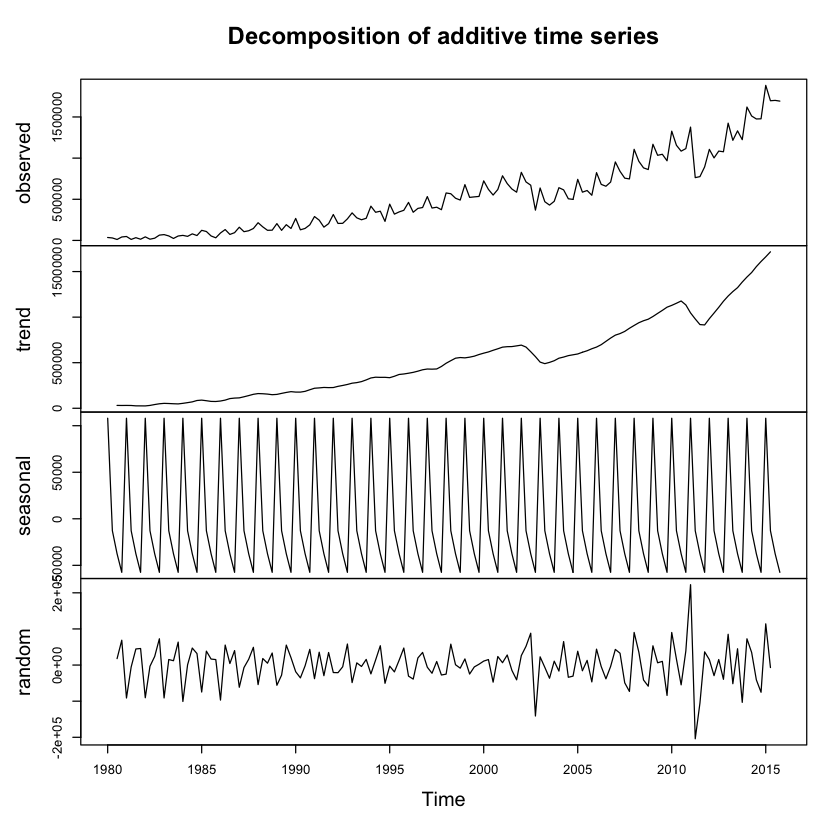

In [5]:
plot(decompose(rev))

## ADF of Raw Data
The ADF of the raw data shows that the data is non-stationary

In [6]:
adf.test(rev, alternative="stationary")


	Augmented Dickey-Fuller Test

data:  rev
Dickey-Fuller = -0.85, Lag order = 5, p-value = 0.955
alternative hypothesis: stationary


## Difference the data

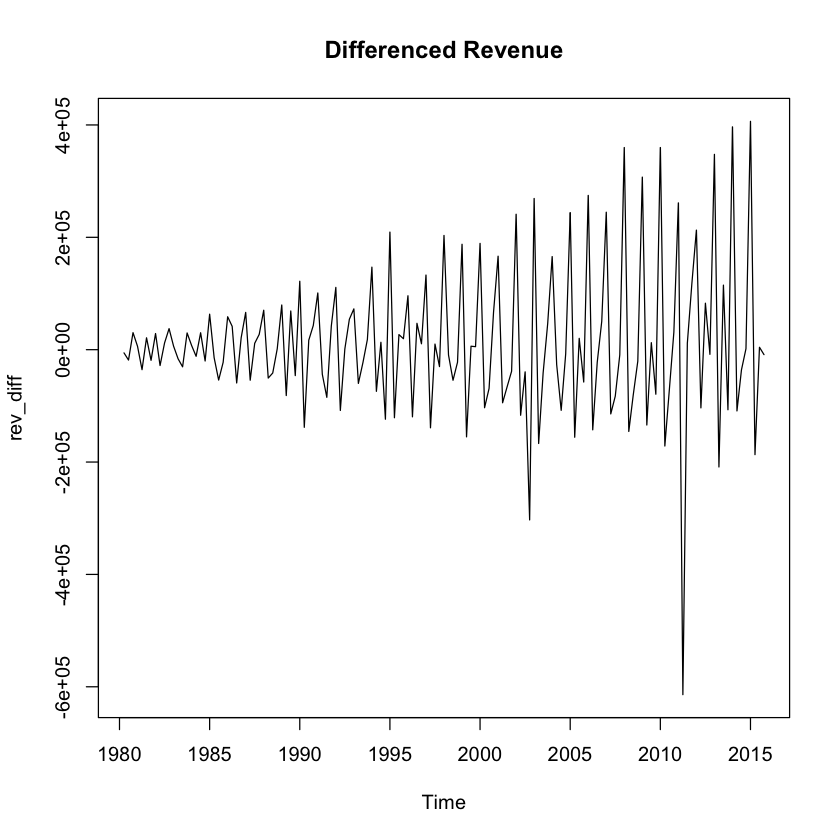

In [7]:
rev_diff = diff(rev)
plot(rev_diff, main="Differenced Revenue")

## ADF of Differenced Data
The ADF of the differenced data shows that we can reject the null hypo of the data being non-stationary since our p-value is smaller than .05. The differened data is stationary. Thus we can use ARIMA models.

In [8]:
adf.test(rev_diff)

Warning message in adf.test(rev_diff):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  rev_diff
Dickey-Fuller = -4.7431, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


# ARIMA Model
Run an auto.arima just to see what it comes up with.

The resulting model does in fact show that first order differencing is required.

In [9]:
aa = auto.arima(rev, approximation=FALSE, trace=FALSE)
summary(aa)

Series: rev 
ARIMA(0,1,1)(0,1,1)[4]                    

Coefficients:
          ma1     sma1
      -0.2884  -0.7462
s.e.   0.0833   0.0501

sigma^2 estimated as 5.083e+09:  log likelihood=-1751.17
AIC=3508.34   AICc=3508.52   BIC=3517.15

Training set error measures:
                   ME     RMSE      MAE       MPE    MAPE     MASE        ACF1
Training set 5309.411 69542.61 43694.13 -4.334411 18.0843 0.504153 0.002931264


## ACF/PACF of Arima Model Resdiuals
The ACF/PACF show that we have a model with residuals of white noise.

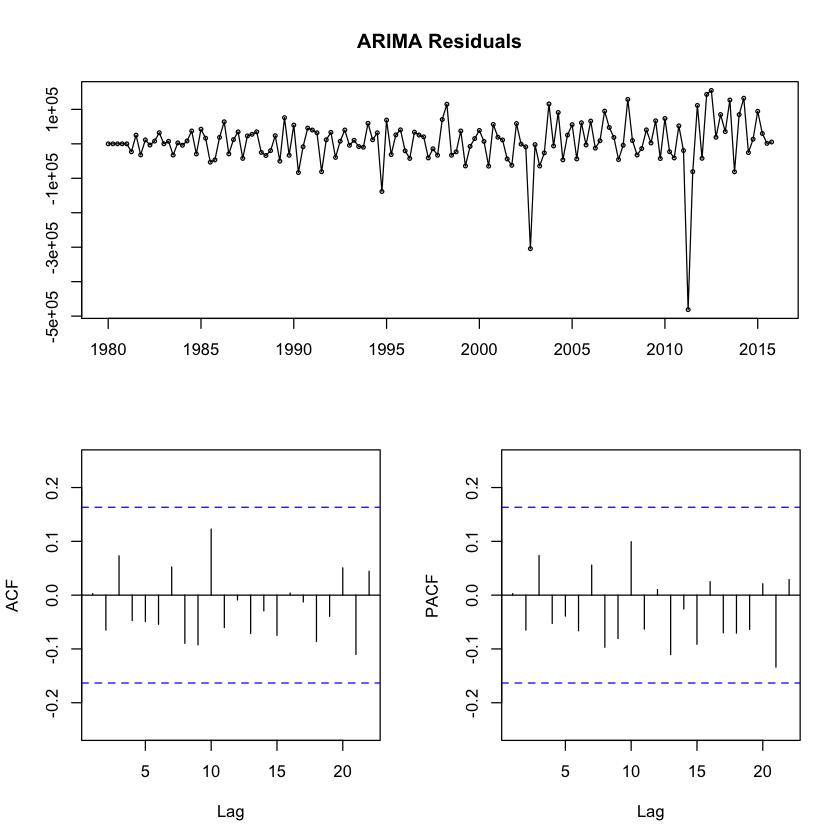

In [36]:
tsdisplay(residuals(aa), main="ARIMA Residuals")

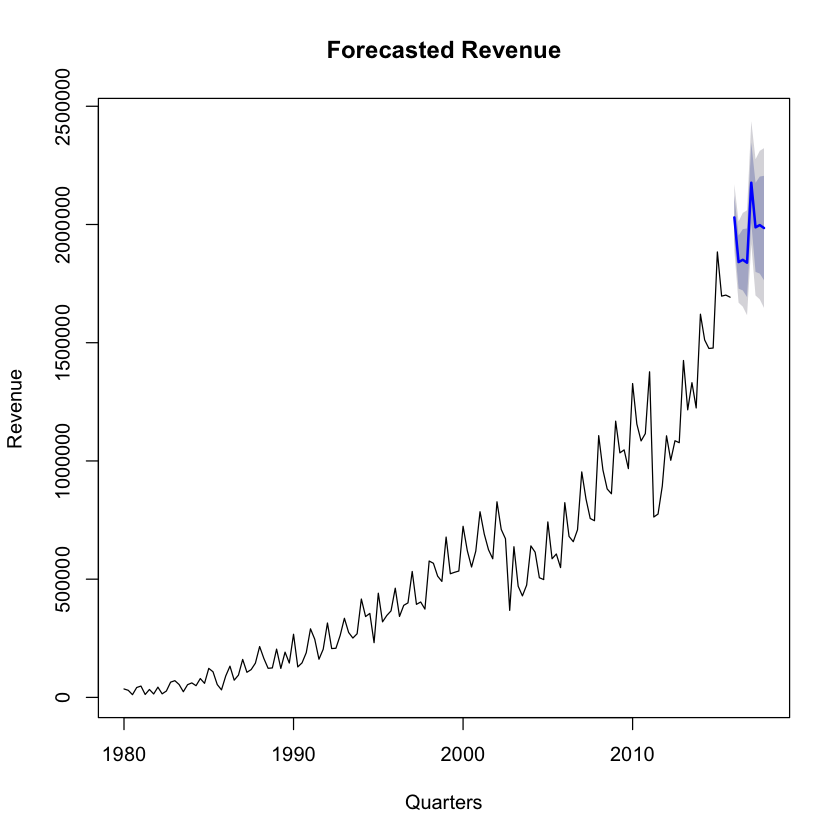

In [40]:
future = forecast(aa, 8)
plot(future, main="Forecasted Revenue", xlab="Quarters", ylab="Revenue")

In [12]:
future$mean

        Qtr1    Qtr2    Qtr3    Qtr4
2016 2029855 1841019 1850709 1838230
2017 2176672 1987836 1997525 1985047

# ETS Model
The result is an Additive Error, Additive Trend, Additive Seasonality model. The AICc of this model is larger than the ARIMA. So I will use the ARIMA model.

In [29]:
fit_ets = ets(rev)
summary(fit_ets)

ETS(A,A,A) 

Call:
 ets(y = rev) 

  Smoothing parameters:
    alpha = 0.6456 
    beta  = 0.0191 
    gamma = 0.1997 

  Initial states:
    l = 10291.6864 
    b = 2232.194 
    s=-52433.47 -37594.39 -12878.08 102905.9

  sigma:  70899.41

     AIC     AICc      BIC 
3948.330 3949.397 3972.089 

Training set error measures:
                   ME     RMSE      MAE      MPE     MAPE      MASE       ACF1
Training set 7750.423 70899.41 47314.62 2.110838 26.14996 0.5459271 0.01859049


## ACF/PACF of ETS Model Resdiuals
The ACF/PACF show that we have a model with residuals of white noise.

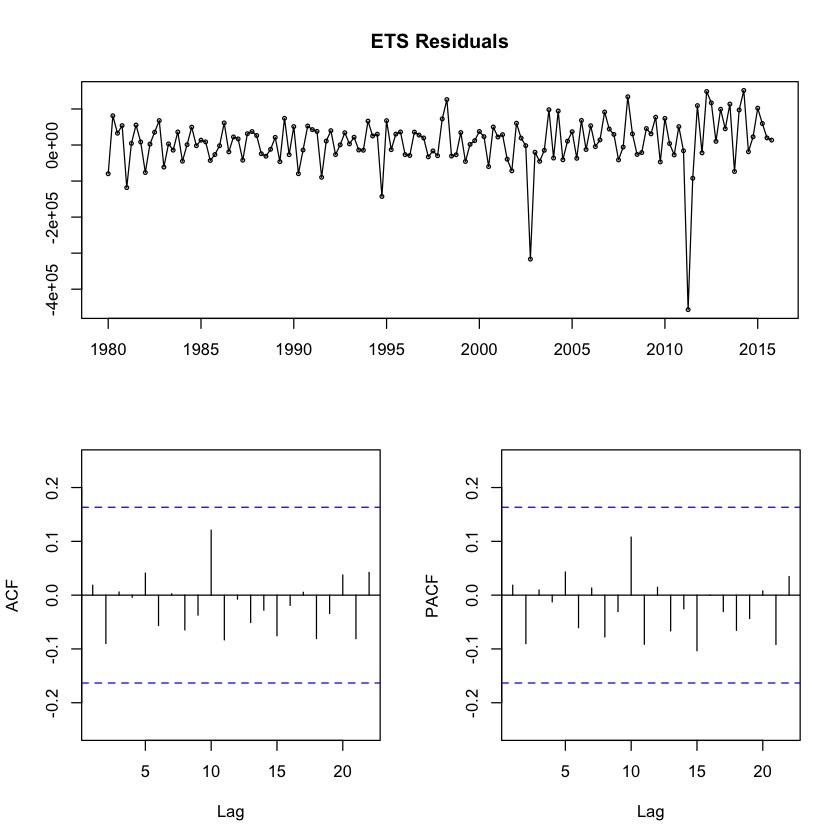

In [37]:
tsdisplay(residuals(fit_ets), main="ETS Residuals")

## Box Ljung Test
The Box results of the residuals show that they are white noise (we didn't reject null hypothesis since the p-value is greater than .0')

In [31]:
Box.test(residuals(fit_ets))


	Box-Pierce test

data:  residuals(fit_ets)
X-squared = 0.049767, df = 1, p-value = 0.8235


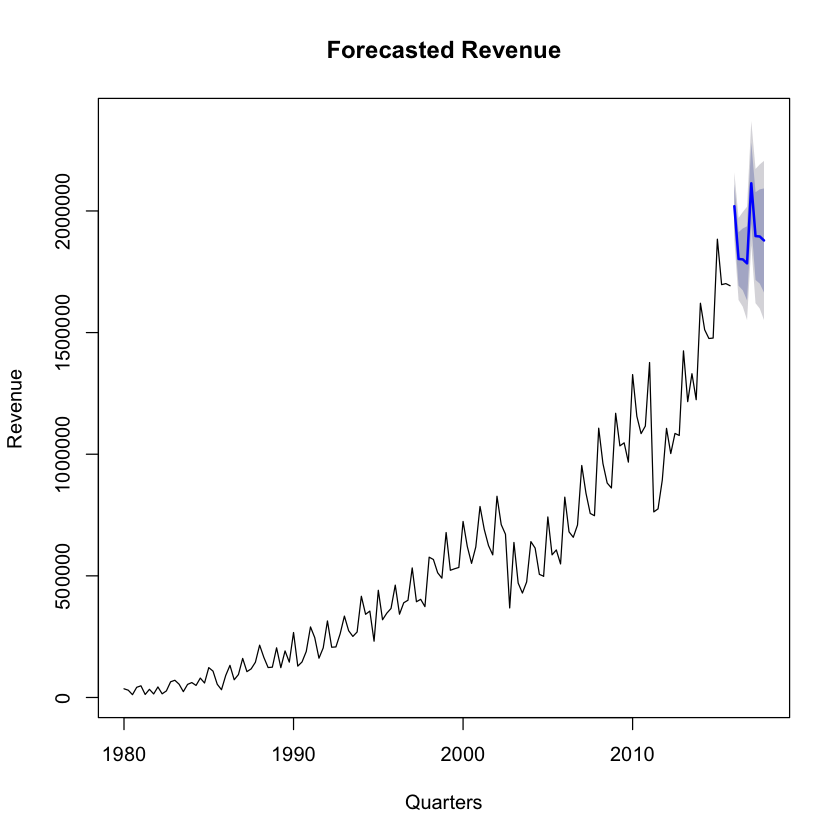

In [39]:
future_ets = forecast(fit_ets, 8)
plot(future_ets, main="Forecasted Revenue", xlab="Quarters", ylab="Revenue")

In [27]:
future_ets$mean

        Qtr1    Qtr2    Qtr3    Qtr4
2016 2019588 1802627 1800940 1784569
2017 2113704 1896743 1895056 1878684